# Faltou verificar se a série é sazonal

# $$Explorando~ uma~ Serie ~Temporal:$$

# $$Modelo~ Exponential~ Smoothing$$


$$Conceito:$$

- As previsões produzidas usando métodos de suavização exponencial são médias ponderadas de observações passadas, com os pesos decaindo exponencialmente à medida que as observações "envelhecem". Em outras palavras, quanto mais recente a observação, maior o peso associado


- Modelo de suavização exponencial trata a tendência presente na série


- A suavização exponencial é um método de previsão de séries temporais para dados univariados.


- Os métodos de suavização exponencial podem ser considerados uma alternativa à popular classe de métodos Box-Jenkins ARIMA para previsão de séries temporais.


$$Tipos~de~ Suavização~ Exponencial:$$

**Existem três tipos principais de métodos de previsão de séries temporais de suavização exponencial:**


**Suavização Exponencial Simples:**


- SES, é um método de previsão de séries temporais para dados univariados sem tendência ou sazonalidade.


- Requer um único parâmetro, chamado alfa (a), também chamado de fator de suavização ou coeficiente de suavização.


- Este parâmetro controla a taxa na qual a influência das observações em etapas anteriores decai exponencialmente. Alfa geralmente é definido como um valor entre 0 e 1. Valores grandes significam que o modelo presta atenção principalmente às observações mais recentes, enquanto valores menores significam que mais da história é levada em consideração ao fazer uma previsão.


- Um valor próximo a 1 indica aprendizado rápido (ou seja, apenas os valores mais recentes influenciam as previsões), enquanto um valor próximo a 0 indica aprendizado lento (observações anteriores têm uma grande influência nas previsões).



**Suavização Exponencial Dupla:**

- A suavização exponencial dupla é uma extensão da suavização exponencial que adiciona explicitamente suporte para tendências na série temporal univariada.


- Além do parâmetro alfa para controlar o fator de suavização, um fator de suavização adicional é adicionado para controlar a deterioração da influência da mudança na tendência chamada beta (b).


- O método suporta tendências que mudam de maneiras diferentes: um aditivo e um multiplicativo, dependendo se a tendência é linear ou exponencial, respectivamente.


- **A suavização exponencial dupla com uma tendência aditiva é classicamente chamada de modelo de tendência linear de Holt:**


- Tendência aditiva: Suavização exponencial dupla com uma tendência linear.
- Tendência multiplicativa: Suavização exponencial dupla com uma tendência exponencial.



**Suavização Exponencial Tripla:**

- A suavização exponencial tripla é uma extensão da suavização exponencial Dupla que adiciona explicitamente suporte à sazonalidade e Tendência à série temporal univariada.


- Esse método é também chamado de suavização exponencial de Holt-Winters


- Além dos fatores de suavização alfa e beta, é adicionado um novo parâmetro chamado gama (g) que controla a influência no componente sazonal.


- **Como na tendência, a sazonalidade pode ser modelada como um processo aditivo ou multiplicativo para uma mudança linear ou exponencial na sazonalidade:**

- Sazonalidade aditiva: suavização exponencial tripla com uma sazonalidade linear.
- Sazonalidade multiplicativa: Suavização exponencial tripla com uma sazonalidade exponencial.


- A suavização exponencial tripla é a variação mais avançada da suavização exponencial e, através da configuração, também pode desenvolver modelos de suavização exponencial dupla e única.

In [1]:
#Pacotes
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

# Carregar os dados


In [72]:
#Instalando e importando a API no código
import yfinance as yf 

# escolhendo uma carteira fictícia para exemplificarmos conceitos
codigo = ['PETR4.SA']

# carregando dados do valor 
petr4 = yf.Ticker(codigo[0])

petr4 = petr4.history(start='2020-01-01', end='2022-04-26') 
petr4 = petr4.iloc[:,0:5]
petr4

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,22.686011,22.827288,22.537298,22.827288,37774500
2020-01-03,22.961127,23.228809,22.641397,22.641397,71595600
2020-01-06,22.626526,23.005742,22.269618,22.909079,81844000
2020-01-07,22.916515,22.961128,22.656269,22.819853,32822000
2020-01-08,22.819854,22.879339,22.485252,22.678577,48215600
...,...,...,...,...,...
2022-04-18,31.160000,31.389999,30.469999,30.719999,76350600
2022-04-19,31.160000,32.000000,31.120001,31.650000,88494100
2022-04-20,31.650000,31.950001,31.330000,31.799999,34694700


**Dados do valor da ação da petrobras**

In [73]:
# Serie Temporal com os dados de maior alta do dia
petr4 = pd.DataFrame(petr4['High'])
petr4

,High
Date,
2020-01-02,22.827288
2020-01-03,23.228809
2020-01-06,23.005742
2020-01-07,22.961128
2020-01-08,22.879339
...,...
2022-04-18,31.389999
2022-04-19,32.000000
2022-04-20,31.950001


**Vamos trabalhar com a variável High, que indica o valor maximo de cada dia de operação**

In [75]:
# Tipos de dados
petr4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 572 entries, 2020-01-02 to 2022-04-25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    572 non-null    float64
dtypes: float64(1)
memory usage: 8.9 KB


**Os dados já estão no formato de série temporal**

In [5]:
# Shape
petr4.shape

(572, 1)

**São 572 observações**

In [6]:
# Transformar o indice em coluna, para extrair as datas
petr4 = petr4.reset_index()
petr4

,Date,High
0,2020-01-02,22.827290
1,2020-01-03,23.228811
2,2020-01-06,23.005744
3,2020-01-07,22.961126
4,2020-01-08,22.879337
...,...,...
567,2022-04-18,31.389999
568,2022-04-19,32.000000
569,2022-04-20,31.950001
570,2022-04-22,31.299999


In [7]:
# Vamos extrair os detalhes da coluna Date: ano, mês, dia 
petr4['ano'] = petr4.Date.dt.year
petr4['mes'] = petr4.Date.dt.month
petr4['dia'] = petr4.Date.dt.day
petr4 = petr4.set_index('Date')
petr4

,High,ano,mes,dia
Date,,,,
2020-01-02,22.827290,2020,1,2
2020-01-03,23.228811,2020,1,3
2020-01-06,23.005744,2020,1,6
2020-01-07,22.961126,2020,1,7
2020-01-08,22.879337,2020,1,8
...,...,...,...,...
2022-04-18,31.389999,2022,4,18
2022-04-19,32.000000,2022,4,19
2022-04-20,31.950001,2022,4,20


In [8]:
# Tipos de dados
petr4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 572 entries, 2020-01-02 to 2022-04-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    572 non-null    float64
 1   ano     572 non-null    int64  
 2   mes     572 non-null    int64  
 3   dia     572 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 22.3 KB


In [9]:
# A variável High é nossa variável target 
target = petr4['High']

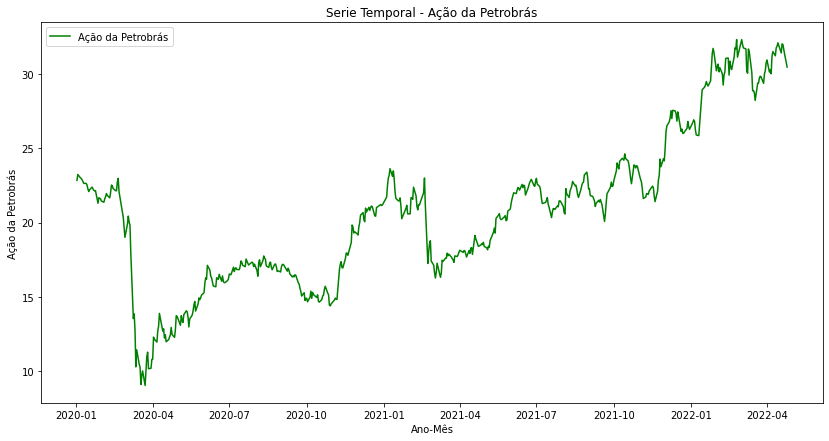

In [10]:
# Plot da Série Temporal
plt.figure(figsize=(14, 7))
plt.title("Serie Temporal - Ação da Petrobrás")
plt.plot(target, label = "Ação da Petrobrás", color = 'green')
plt.xlabel("Ano-Mês")
plt.ylabel("Ação da Petrobrás")
plt.legend(loc = "best");

**Série aparenta ter sazonalidade e tendência**

<AxesSubplot:xlabel='ano'>

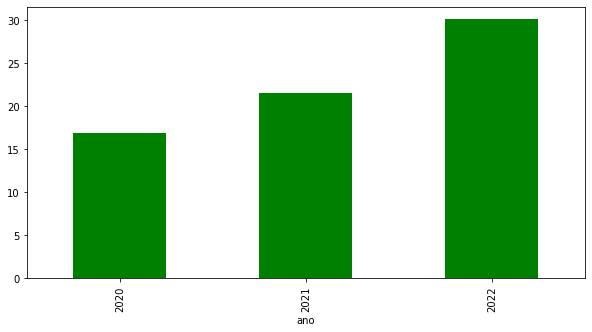

In [11]:
# Vamos criar um gráfico de barras com grafico por ano. 
plt.figure(figsize=(10, 5))
petr4.groupby('ano')['High'].mean().plot.bar(color = 'green')

**Tendência clara de alta**

<AxesSubplot:xlabel='mes'>

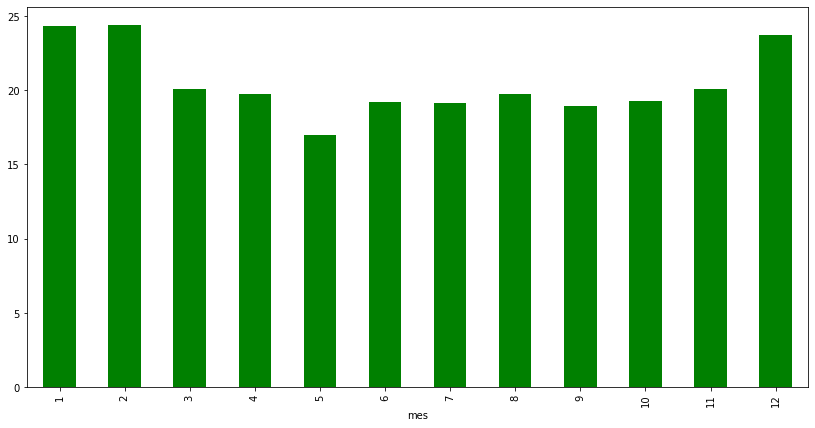

In [12]:
# Vamos criar um gráfico de barras por mês. 
plt.figure(figsize=(14, 7))
petr4.groupby('mes')['High'].mean().plot.bar(color = 'green')

**Os meses de dezembro a fevereiro são os que tem o maior índice de alta**

<AxesSubplot:xlabel='dia'>

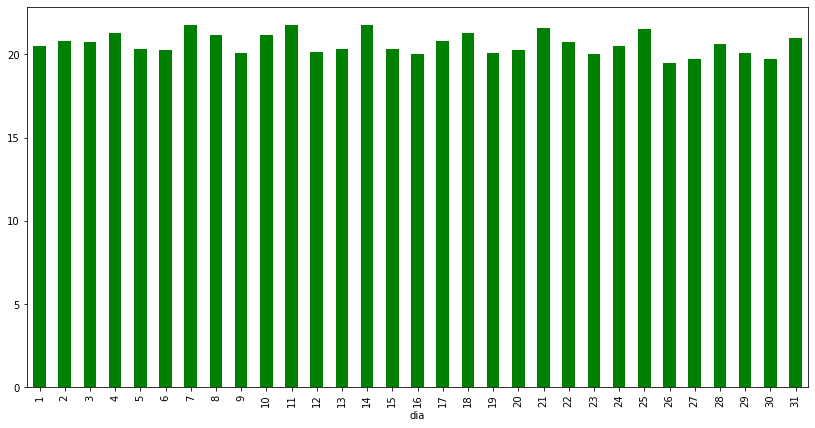

In [13]:
# A média diária por dia do mês
plt.figure(figsize=(14, 7))
petr4.groupby('dia')['High'].mean().plot.bar(color = 'green')

**Os dias do mês não parece ser relevante**

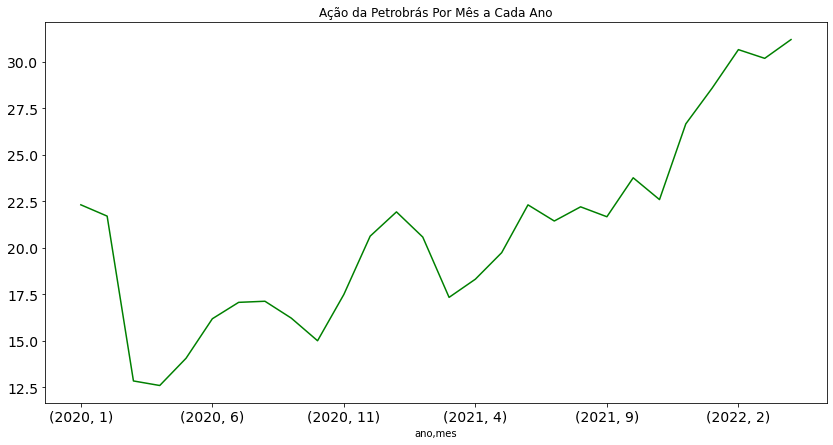

In [14]:
# Calcular a média mensal por ano
plt.figure(figsize=(14, 7))
media_mensal = petr4.groupby(['ano','mes'])['High'].mean()
media_mensal.plot(title = "Ação da Petrobrás Por Mês a Cada Ano", fontsize = 14, color = 'green');

**Tendência de alta com o passar dos meses**

### Modelo Aditivo (sazonalidade constante) X Modelo Multiplicativo (sazonalidade crescente)

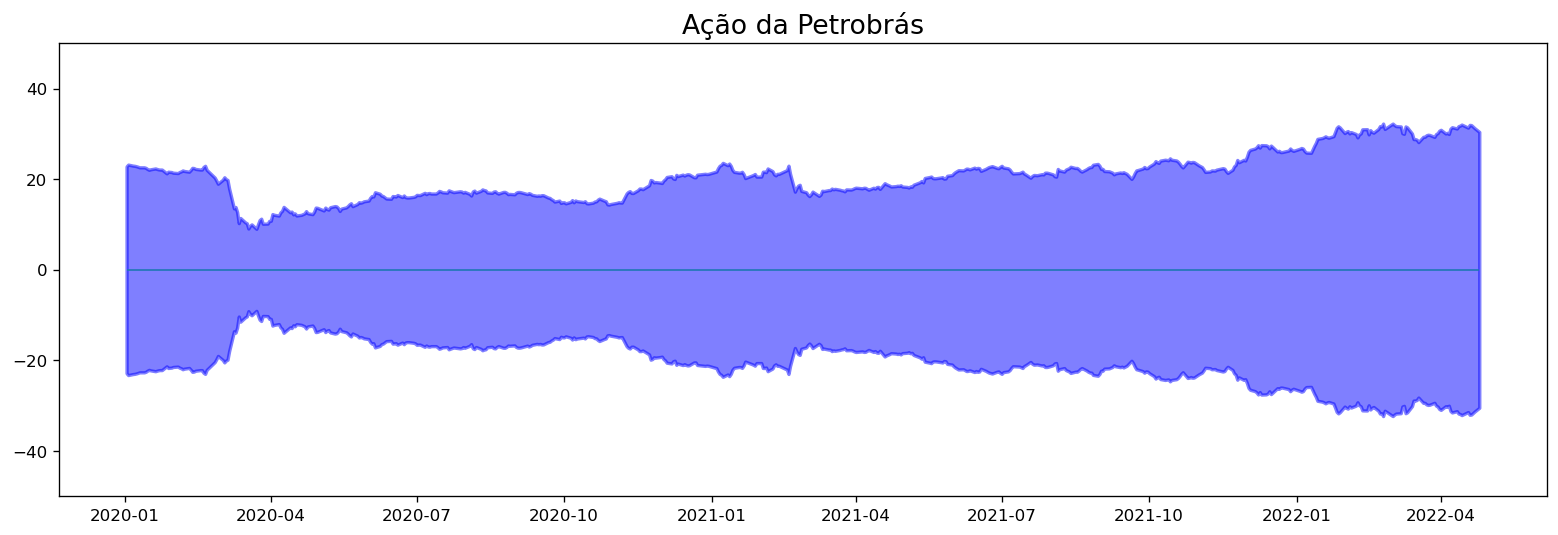

In [15]:
#Grafico de linha para verificar a variação nos dados em relação ao tempo

# Prepara os dados
x = petr4.index.values
y1 = petr4['High'].values


# Plot

# Área de plotagem
fig, ax = plt.subplots(1, 1, figsize = (16,5), dpi = 120)

# Preenchimento do gráfico
plt.fill_between(x, y1 = y1, y2 = -y1, alpha = 0.5, linewidth = 2, color = 'blue')


# Limites do eixo y
plt.ylim(-50, 50)


# Título
plt.title('Ação da Petrobrás', fontsize = 16)


# Limite das linhas
plt.hlines(y = 0, xmin = np.min(petr4.index), xmax = np.max(petr4.index), linewidth = 1);


# Mostra o gráfico
plt.show()

**A Série Temporal não tem uma clareza nos dados para saber se a sazonalidade é aditiva ou multiplicativa, o correto é testar as 2 formas**

## Pré-Processamento

- Vamos dividir os dados em treino, teste e validação 

In [16]:
# Observe que os registros são separados em ordem cronológica.
df_treino = petr4.iloc[0:420]
df_valid = petr4.iloc[420:500]
df_teste = petr4.iloc[500:]
df_treino.head(5)

,High,ano,mes,dia
Date,,,,
2020-01-02,22.827290,2020,1,2
2020-01-03,23.228811,2020,1,3
2020-01-06,23.005744,2020,1,6
2020-01-07,22.961126,2020,1,7
2020-01-08,22.879337,2020,1,8


# Modelagem:

- ## Versão 1 do modelo - Simple Exponential Smoothing

- A função SimpleExpSmoothing() recebe os dados de treino no formato de array numpy


- A função fit() faz o treinamento


- O hiperparâmetro smoothing_level define o nível de suavização exponencial na série


- O hiperparâmetro optimized define se teremos ou não otimização 

In [55]:
#Treinar o modelo
import statsmodels
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing 
import warnings
warnings.filterwarnings('ignore')

#modelo 1
modelo_v1 = SimpleExpSmoothing(np.asarray(df_treino['High'])).fit(smoothing_level = 0.1, optimized = True) 

**Foram testados varios valores do parametro smoothing_level, e o melhor encontrado foi o valor de: 0.1**

In [56]:
# Previsões com o Modelo
import warnings
warnings.filterwarnings('ignore')

df_valid['previsoes_v1'] = modelo_v1.forecast(len(df_valid)) 

In [57]:
# Valor real e valor "previsto"
df_valid[['High', 'previsoes_v1']].head()

,High,previsoes_v1
Date,,
2021-09-13,21.492603,21.998212
2021-09-14,21.378585,21.998212
2021-09-15,21.549611,21.998212
2021-09-16,21.370439,21.998212
2021-09-17,21.191267,21.998212


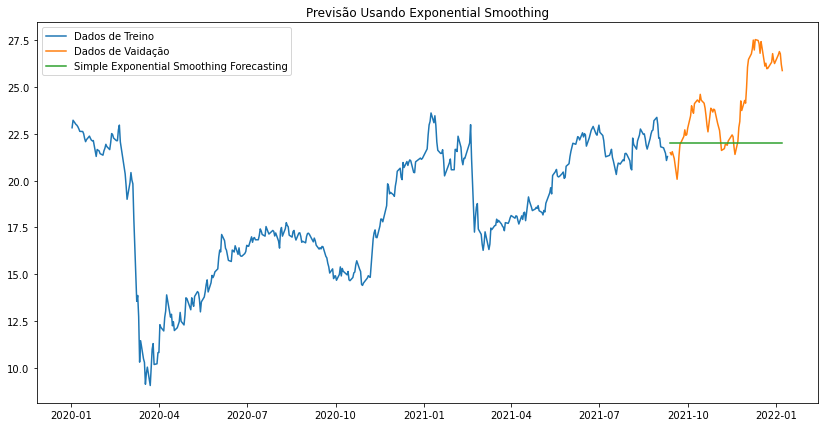

In [58]:
# Plot
plt.figure(figsize=(14, 7))
plt.title("Previsão Usando Exponential Smoothing") 
plt.plot(df_treino['High'], label = 'Dados de Treino')
plt.plot(df_valid['High'], label = 'Dados de Vaidação')
plt.plot(df_valid['previsoes_v1'], label = 'Simple Exponential Smoothing Forecasting') 
plt.legend(loc = 'best') 
plt.show()

**Como o algoritimo Simple Exponential Smoothing não leva em conta a sazonalidade e a tendência, podemos observar um resultado ruim, pois a série tem tendência e sazonalidade**

### Calcular o erro usando RMSE

In [59]:
# Define valor real e valor previsto
y_true = df_valid.High
y_pred = df_valid.previsoes_v1

# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse1 = sqrt(mean_squared_error(y_true, y_pred)) 
print(metrica_rmse1)

2.8818126382151315


**Nosso objetivo é reduzir o RMSE tanto quanto possível, pois essa métrica indica a taxa de erro do modelo**

## Versão 2 do modelo - Double Exponential Smoothings

- Ao usar o hiperparâmetro trend, definimos o método Double Exponential Smoothing.


- Testar a série aditiva e Multiplicativa

In [60]:
#Treinar os modelos
modelo_v2_add = ExponentialSmoothing(np.asarray(df_treino['High']), trend = 'additive').fit(smoothing_level = 0.1, 
                                                                                         optimized = True) 

modelo_v2_mult = ExponentialSmoothing(np.asarray(df_treino['High']), trend = 'multiplicative').fit(smoothing_level = 0.1, 
                                                                                         optimized = True)

**Foram testados varios valores do parametro smoothing_level, e o melhor encontrado foi o valor de: 0.1**

In [61]:
# Previsões com os Modelos

df_valid['previsoes_v2_add'] = modelo_v2_add.forecast(len(df_valid))

df_valid['previsoes_v2_mult'] = modelo_v2_mult.forecast(len(df_valid))

In [62]:
# Valor real e valor "previsto"

df_valid[['High', 'previsoes_v2_add', 'previsoes_v2_mult']].head()

,High,previsoes_v2_add,previsoes_v2_mult
Date,,,
2021-09-13,21.492603,22.379332,22.392419
2021-09-14,21.378585,22.395927,22.410020
2021-09-15,21.549611,22.412523,22.427634
2021-09-16,21.370439,22.429118,22.445262
2021-09-17,21.191267,22.445714,22.462904


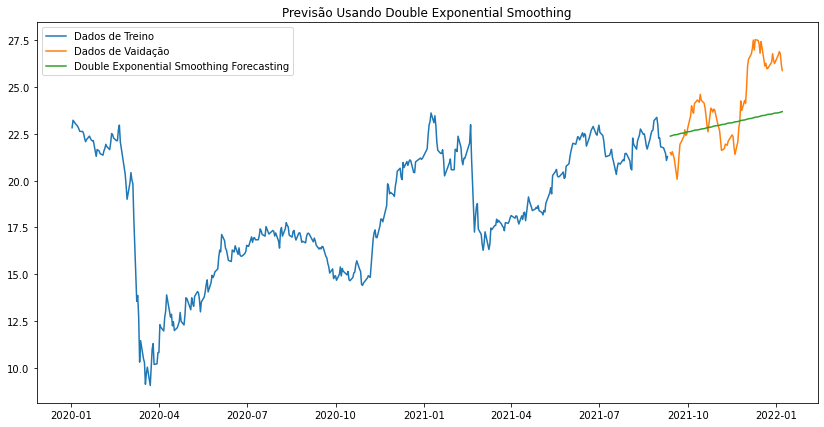

In [63]:
# Plot previsoes_v2_add
plt.figure(figsize=(14, 7))
plt.title("Previsão Usando Double Exponential Smoothing") 
plt.plot(df_treino['High'], label = 'Dados de Treino')
plt.plot(df_valid['High'], label = 'Dados de Vaidação')
plt.plot(df_valid['previsoes_v2_add'], label = 'Double Exponential Smoothing Forecasting') 
plt.legend(loc = 'best') 
plt.show()

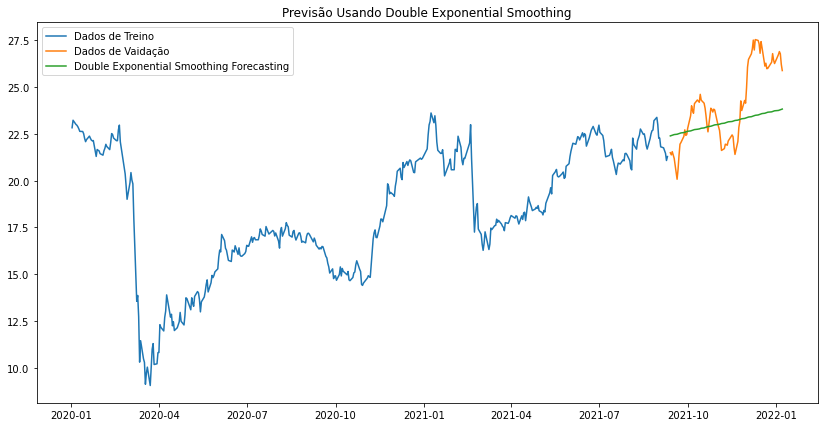

In [64]:
# Plot previsoes_v2_mult
plt.figure(figsize=(14, 7))
plt.title("Previsão Usando Double Exponential Smoothing") 
plt.plot(df_treino['High'], label = 'Dados de Treino')
plt.plot(df_valid['High'], label = 'Dados de Vaidação')
plt.plot(df_valid['previsoes_v2_mult'], label = 'Double Exponential Smoothing Forecasting') 
plt.legend(loc = 'best') 
plt.show()

**Note que graficamente não há diferença significativa entre os modelos com o parâmetro,  trend = 'additive' e trend = 'multiplicative'**

### Calcular o erro usando RMSE

In [65]:
# Define valor real e valor previsto
y_true = df_valid.High
y_pred_add = df_valid.previsoes_v2_add
y_pred_mult = df_valid.previsoes_v2_mult

# Calcula o erro do modelo add usando RMSE (Root Mean Squared Error)
metrica_rmse2 = sqrt(mean_squared_error(y_true, y_pred_add)) 
print(f'Modelo additive:       {metrica_rmse2}')

# Calcula o erro do modelo mult usando RMSE (Root Mean Squared Error)
metrica_rmse21 = sqrt(mean_squared_error(y_true, y_pred_mult)) 
print(f'Modelo multiplicative: {metrica_rmse21}')

Modelo additive:       2.0232042637667655
Modelo multiplicative: 1.968838806051387


**Não há diferença significativa entre os modelos com parâmetro 'additive' e 'multiplicative'**

## Versão 3 do modelo - Triple Exponential Smoothing

- Ao usar o hiperparâmetro trend e seasonal, definimos o método Triple Exponential Smoothing.

In [87]:
len(df_treino)

420

In [117]:
#Treinar o modelo
modelo_v3 = ExponentialSmoothing(np.asarray(df_treino['High']), 
                                 trend = 'multiplicative',seasonal='multiplicative',
                                 seasonal_periods=36).fit(smoothing_level =0.1,optimized = True) 

In [118]:
# Previsões com os Modelos

df_valid['previsoes_v3'] = modelo_v3.forecast(len(df_valid))

In [119]:
# Valor real e valor "previsto"

df_valid[['High', 'previsoes_v3']].head()

,High,previsoes_v3
Date,,
2021-09-13,21.492603,22.616628
2021-09-14,21.378585,22.898972
2021-09-15,21.549611,23.037396
2021-09-16,21.370439,22.811302
2021-09-17,21.191267,22.556726


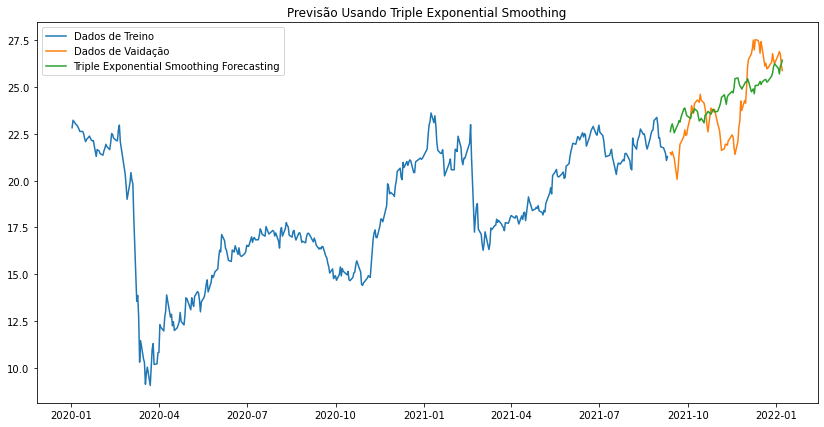

In [120]:
# Plot previsoes_v3
plt.figure(figsize=(14, 7))
plt.title("Previsão Usando Triple Exponential Smoothing") 
plt.plot(df_treino['High'], label = 'Dados de Treino')
plt.plot(df_valid['High'], label = 'Dados de Vaidação')
plt.plot(df_valid['previsoes_v3'], label = 'Triple Exponential Smoothing Forecasting') 
plt.legend(loc = 'best') 
plt.show()

### Calcula o erro usando RMSE

In [121]:
# Define valor real e valor previsto
y_true = df_valid.High
y_pred = df_valid.previsoes_v3

# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse3 = sqrt(mean_squared_error(y_true, y_pred)) 
print(metrica_rmse3)

1.6157440369480696


**Houve uma melhora em relação ao modelo Double Exponential Smoothing**

# Comparação entre todos os modelos

In [122]:

metrics = pd.Series(metrica_rmse1,index=['Valores'])
metrics = pd.DataFrame(metrics,columns=['Exponential Smoothing'])
metrics['Double Exponential Smoothing Add'] = metrica_rmse2
metrics['Double Exponential Smoothing Mult'] = metrica_rmse21
metrics['Triple Exponential Smoothing'] = metrica_rmse3
metrics = metrics.T
metrics

,Valores
Exponential Smoothing,2.881813
Double Exponential Smoothing Add,2.023204
Double Exponential Smoothing Mult,1.968839
Triple Exponential Smoothing,1.615744


**Podemos notar que para esse conjunto de dados e para as metricas usadas para construção do algoritimo, o melhor modelo foi o Triple Exponential Smoothing, pois esse algoritimo leva em consideração a tendência e Sazonalidade da série temporal**